<a href="https://colab.research.google.com/github/Makssadilov2702/Matplotlib-Seaborn-Altair/blob/main/1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Библиотеки визуализации данных**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

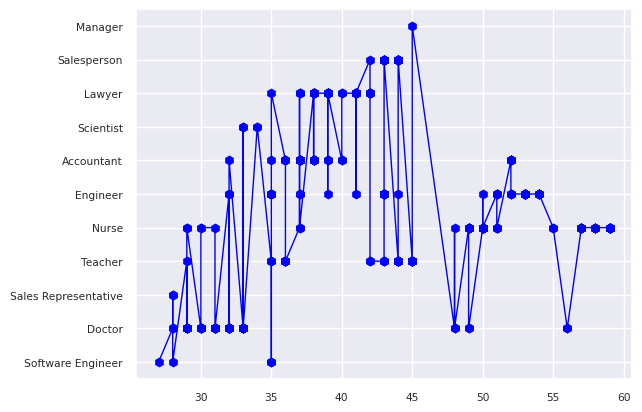

In [ ]:
cl=['Age','Stress_Level','Gender','BMI_Category','Sleep_Disorder','Blood_Pressure','Occupation','Sleep_Duration','Quality_of_Sleep','Physical_Activity_Level', 'Heart_Rate',	'Daily_Steps']
ds=pd.read_csv('/content/gdrive/MyDrive/SMADdataset/Sleep_health_and_lifestyle_1.csv',usecols=cl)
#ds.head()
plt.plot(ds.Age, ds.Occupation, color="blue", marker="h", linewidth=1)


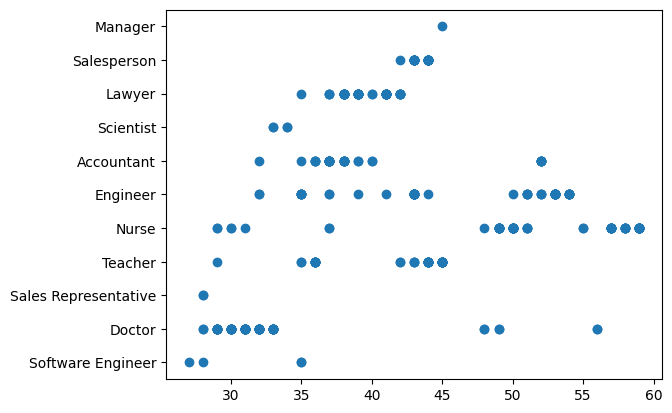

In [ ]:
x=[ds.Age]
y=[ds.Occupation]
plt.scatter(ds.Age,ds.Occupation)

Text(0.5, 1.0, 'Распределение опрошенных по возрасту')

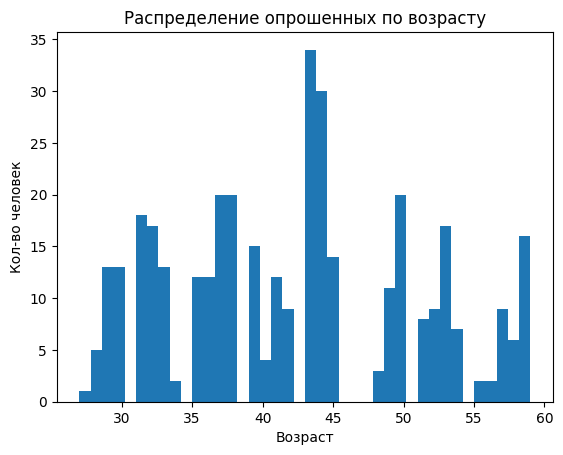

In [ ]:
plt.hist(ds.Age,bins=40)   #разбиение по ox на bins-участков и определение в каждом бине кол-ва значений
plt.xlabel('Возраст'),
plt.ylabel('Кол-во человек'),
plt.title('Распределение опрошенных по возрасту')

[Text(0.5, 0, 'Возраст'),
 Text(0, 0.5, 'Кол-во человек'),
 Text(0.5, 1.0, 'Распределение опрошенных по возрасту')]

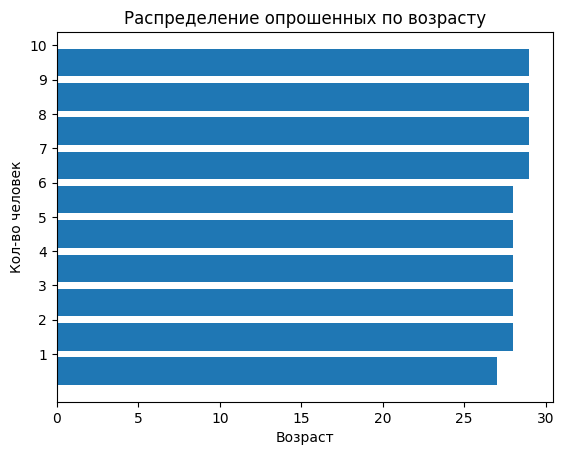

In [ ]:
fig, ax=plt.subplots()
ax.barh(np.arange(10), ds.Age.iloc[:10])
ax.set_yticks(np.arange(0.5,10.5,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='Возраст',ylabel='Кол-во человек',title='Распределение опрошенных по возрасту')

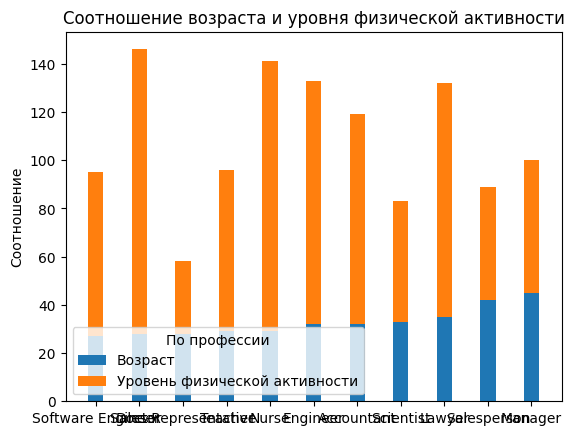

In [ ]:
width=0.35
fig, ax=plt.subplots()
ax.bar(ds.Occupation, ds.Age, width, label='Возраст')
ax.bar(ds.Occupation, ds.Physical_Activity_Level, width, bottom=ds.Age,label='Уровень физической активности')
ax.set_ylabel('Соотношение')
ax.set_title('Соотношение возраста и уровня физической активности')
ax.legend(loc='lower left', title='По профессии')
figsize=(20,100)

<ipython-input-10-5bf0dcab5827>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['Sleep_Disorder'].fillna("No",inplace=True)


<Axes: xlabel='Sleep_Disorder'>

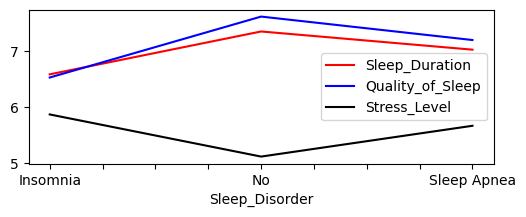

In [ ]:
cl=['Sleep_Disorder','Sleep_Duration','Quality_of_Sleep','Stress_Level']
ds=pd.read_csv('/content/gdrive/MyDrive/SMADdataset/Sleep_health_and_lifestyle_1.csv',usecols=cl)
ds['Sleep_Disorder'].fillna("No",inplace=True)
#ds.head()
(ds.groupby('Sleep_Disorder').mean().plot(color=['red','blue','black'],fontsize=10.0,figsize=(6,2)))

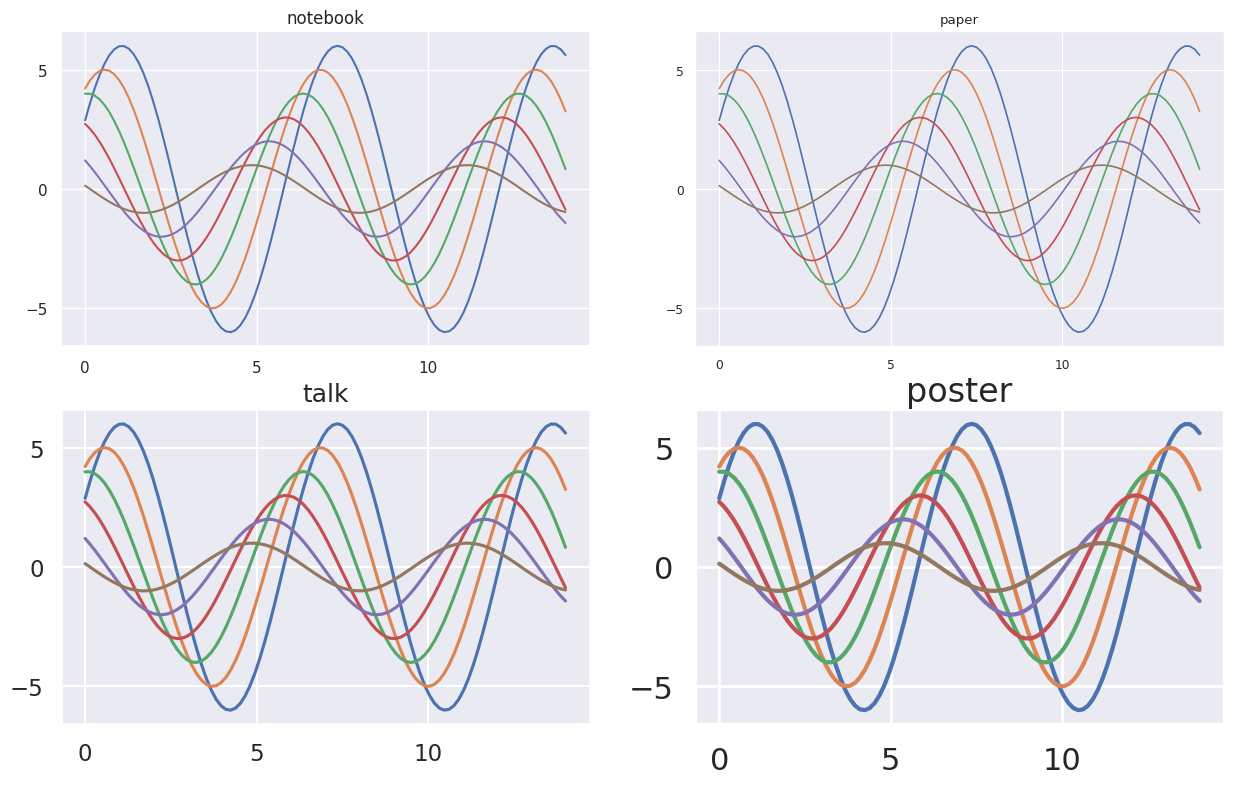

In [ ]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
plt.figure(figsize=(15, 9))

for i, context in enumerate(['notebook', 'paper', 'talk', 'poster']):
    sns.set_context(context)
    plt.subplot(2, 2, i+1)
    sinplot()
    plt.title(context)

plt.show()


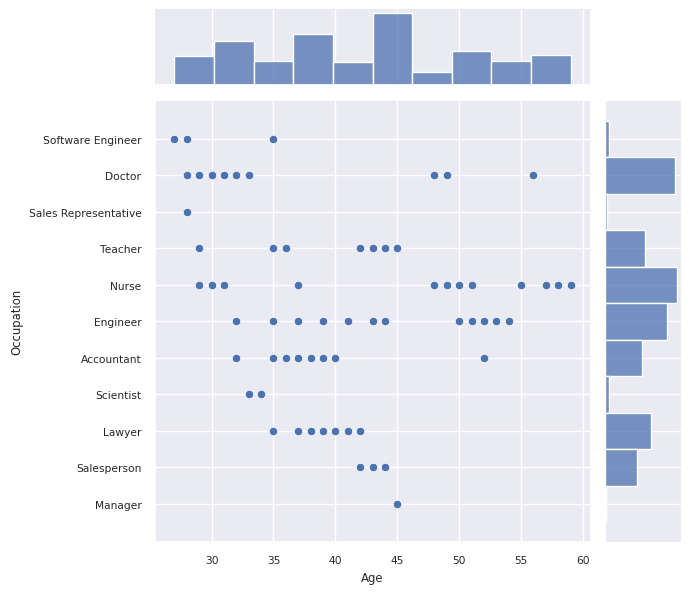

In [ ]:
sns.set(font_scale=0.7)
sns.jointplot(x="Age", y="Occupation", data=ds)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


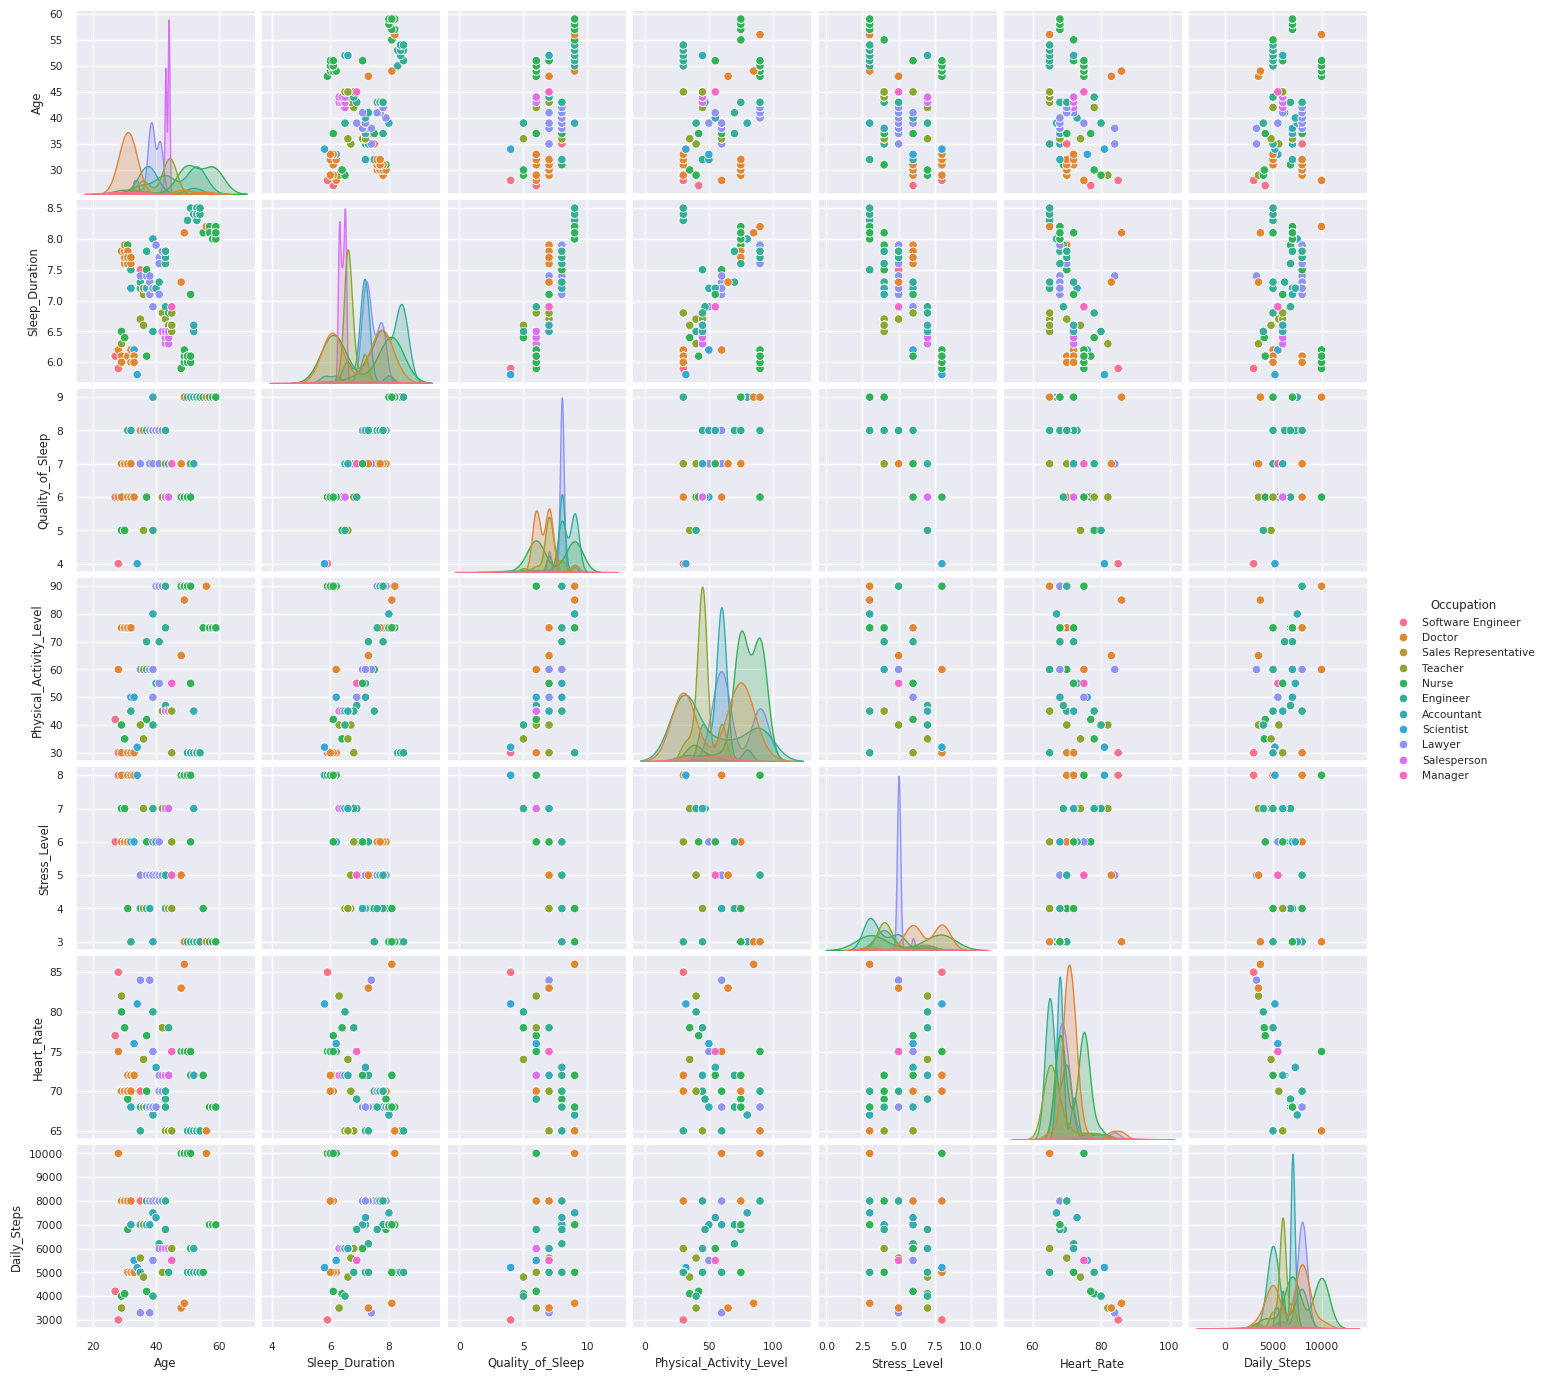

In [ ]:
sns.pairplot(ds, hue='Occupation', size=2)

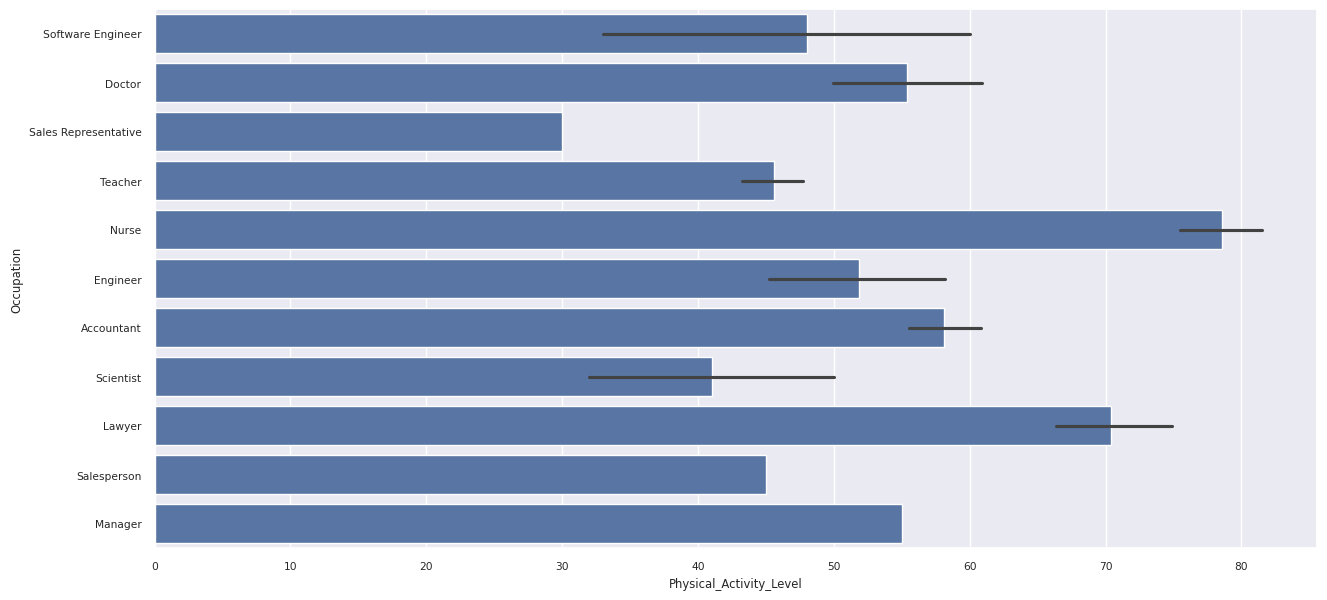

In [ ]:
sns.set(font_scale=0.7)
plt.figure(figsize=(15, 7))
l = ds['Physical_Activity_Level']
w = ds['Occupation']
sns.barplot(x=l, y=w);

In [ ]:
!pip install altair vega_datasets

In [ ]:
import altair as alt

In [ ]:
from vega_datasets import data as vd
df = pd.read_json(vd.movies.url)
#print(type(df))
#print("Размерность набора данных df:")
df.shape
df.head(2)

Title  US_Gross  Worldwide_Gross  US_DVD_Sales  \
0          The Land Girls  146083.0         146083.0           NaN   
1  First Love, Last Rites   10876.0          10876.0           NaN   

   Production_Budget Release_Date MPAA_Rating  Running_Time_min Distributor  \
0          8000000.0  Jun 12 1998           R               NaN    Gramercy   
1           300000.0  Aug 07 1998           R               NaN      Strand   

  Source Major_Genre Creative_Type Director  Rotten_Tomatoes_Rating  \
0   None        None          None     None                     NaN   
1   None       Drama          None     None                     NaN   

   IMDB_Rating  IMDB_Votes  
0          6.1      1071.0  
1          6.9       207.0

In [ ]:
alt.Chart(df).mark_point().encode(alt.X('Production_Budget'),alt.Y('Worldwide_Gross'))

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_point(filled=True).encode(
    alt.X('Production_Budget'),
    alt.Y('Worldwide_Gross'),
    alt.Size('US_Gross'),
    alt.Color('Major_Genre'),
    alt.OpacityValue(0.7),
    tooltip=[
        alt.Tooltip('Title'),
        alt.Tooltip('Production_Budget'),
        alt.Tooltip('Worldwide_Gross'),
        alt.Tooltip('US_Gross')
    ]
).interactive()

alt.Chart(...)

In [ ]:
from vega_datasets import data
stocks = data.stocks()

import altair as alt
alt.Chart(stocks).mark_line().encode(
    x='date:T',
    y='price',
    color='symbol'
).interactive(bind_y=False)

alt.Chart(...)

In [ ]:
import altair as alt
from vega_datasets import data

cars = data.cars()

interval = alt.selection_interval()

points = alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).add_selection(
    interval
)

histogram = alt.Chart(cars).mark_bar().encode(
    y=alt.Y('Horsepower:Q', bin=True),
    x='count()',
    color='Origin'
).transform_filter(
    interval
)

chart = points & histogram
chart

<ipython-input-23-6522179bd432>:12: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.VConcatChart(...)

In [ ]:
ds['Age'] = pd.to_numeric(ds['Age'], errors='coerce')

In [ ]:
import pandas as pd
import altair as alt

df = pd.read_csv('/content/gdrive/MyDrive/SMADdataset/Sleep_health_and_lifestyle_1.csv')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Stress_Level'] = pd.to_numeric(df['Stress_Level'], errors='coerce')
df['BMI_Category'] = df['BMI_Category'].replace('Normal Weight', 'Normal')

interval = alt.selection_interval()

points = alt.Chart(df).mark_point().encode(
    x='Age:Q',
    y='Stress_Level:Q',
    color=alt.condition(interval, 'BMI_Category:N', alt.value('lightgray'))
).add_selection(
    interval
)

histogram = alt.Chart(df).mark_bar().encode(
    x=alt.X('Age:Q', bin=True),
    y='count()',
    color='BMI_Category:N'
).transform_filter(
    interval
)

chart = points & histogram
chart

<ipython-input-30-34c81db459b1>:15: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use add_params instead.



alt.VConcatChart(...)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])],
    layout=go.Layout(
        title=go.layout.Title(text="A Figure Specified By A Graph Object")
    )
)

fig.show()

In [ ]:
import plotly.express as px

df = px.data.iris()

p1 = px.scatter(df,
                x="sepal_width", y="sepal_length",
                color="species",
                title="Распределение высоты и ширины чашелистика у разных видов ирисов")

p1.show()

In [ ]:
import pandas as pd
ds['BMI_Category'] = df['BMI_Category'].replace('Normal Weight', 'Normal')
ds.head()

Gender  Age            Occupation  Sleep_Duration  Quality_of_Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical_Activity_Level  Stress_Level BMI_Category Blood_Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8        Obese         140/90   

   Heart_Rate  Daily_Steps Sleep_Disorder  
0          77         4200            NaN  
1          75        10000            NaN  
2          75        10000            NaN  
3          85         3000    Sleep Apnea  
4          85         3000    Sleep Apnea

In [ ]:
import plotly.express as px

p1 = px.scatter(ds,
                x="Occupation", y="Age",
                color="BMI_Category",
                title="Распределение возраста и профессии по категориям ИМТ")

p1.show()

In [ ]:
pip install sweetviz

In [ ]:
import sweetviz as sv
import pandas as pd

ds = pd.read_csv('/content/gdrive/MyDrive/SMADdataset/Sleep_health_and_lifestyle_1.csv')
report = sv.analyze(ds)
report.show_html("report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
